In [1]:
import pandas as pd
import numpy as np
import sqlite3

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

In [2]:
#C:\Users\Pippo\Desktop\python_examples\Week_05\ml-latest-small\ml-latest-small

PATH = 'C:/Users/Pippo/Desktop/python_examples/week_05/'

df = pd.read_csv('ratings.csv')
df2 = pd.read_csv('movies.csv')
df3 = pd.read_csv('tags.csv')
df4 = pd.read_csv('links.csv')

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df3.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
df4.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
db = sqlite3.connect('ML_complete.db')
#db.executescript(DB_SETUP)
#df.to_sql('ml_ratings', db)
#df2.to_sql('ml_movies', db)
#df3.to_sql('ml_tags', db)
#df4.to_sql('ml_links', db)
db

In [8]:
#def q(query):
#    return pd.read_sql(query, db)

In [9]:
#q

In [10]:
df = pd.read_sql('SELECT * FROM ml_ratings', db)
df

,index,userId,movieId,rating,timestamp
0,0,1,1,4.0,964982703
1,1,1,3,4.0,964981247
2,2,1,6,4.0,964982224
3,3,1,47,5.0,964983815
4,4,1,50,5.0,964982931
5,5,1,70,3.0,964982400
6,6,1,101,5.0,964980868
7,7,1,110,4.0,964982176
8,8,1,151,5.0,964984041
9,9,1,157,5.0,964984100


In [11]:
query = "SELECT movieId, userId, rating FROM ml_ratings"
df = pd.read_sql(query, db)
df.head(10)

,movieId,userId,rating
0,1,1,4.0
1,3,1,4.0
2,6,1,4.0
3,47,1,5.0
4,50,1,5.0
5,70,1,3.0
6,101,1,5.0
7,110,1,4.0
8,151,1,5.0
9,157,1,5.0


In [12]:
ratings_1 = df.groupby(['userId', 'movieId'])['rating'].mean()
ratings_1

userId  movieId
1       1          4.0
        3          4.0
        6          4.0
        47         5.0
        50         5.0
        70         3.0
        101        5.0
        110        4.0
        151        5.0
        157        5.0
        163        5.0
        216        5.0
        223        3.0
        231        5.0
        235        4.0
        260        5.0
        296        3.0
        316        3.0
        333        5.0
        349        4.0
        356        4.0
        362        5.0
        367        4.0
        423        3.0
        441        4.0
        457        5.0
        480        4.0
        500        3.0
        527        5.0
        543        4.0
                  ... 
610     150401     3.0
        152077     4.0
        152081     4.0
        152372     3.5
        155064     3.5
        156371     5.0
        156726     4.5
        157296     4.0
        158238     5.0
        158721     3.5
        158872     3.5
        158956    

In [13]:
ratings_2 = ratings_1.unstack()
ratings_2.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ratings_2 = ratings_2.fillna(0.0)
ratings_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Columns: 9724 entries, 1 to 193609
dtypes: float64(9724)
memory usage: 45.3 MB


In [15]:
R = ratings_2
R

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# NMF

In [16]:
# model assumes R ~ PQ'
model = NMF(n_components=2, init='random', random_state=10)
model.fit(R)

NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=2, random_state=10, shuffle=False,
  solver='cd', tol=0.0001, verbose=0)

In [17]:
model.components_

array([[1.73768425, 1.22641188, 0.        , ..., 0.00856849, 0.00856849,
        0.02779699],
       [2.43690555, 1.09014637, 0.90220851, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
P = model.components_  # movie feature
P

array([[1.73768425, 1.22641188, 0.        , ..., 0.00856849, 0.00856849,
        0.02779699],
       [2.43690555, 1.09014637, 0.90220851, ..., 0.        , 0.        ,
        0.        ]])

In [19]:
Q = model.transform(R)  # user feature
Q

array([[0.04242387, 0.97663134],
       [0.12884287, 0.        ],
       [0.        , 0.02691567],
       ...,
       [0.87063571, 1.16000402],
       [0.        , 0.15133629],
       [2.32279386, 0.03189903]])

In [20]:
# Value of the Loss Fuction
model.reconstruction_err_


1004.871857192682

In [21]:
Q.shape, P.shape

((610, 2), (2, 9724))

In [22]:
nR = np.dot(Q, P)
nR

array([[2.45367763e+00, 1.11670026e+00, 8.81125112e-01, ...,
        3.63508534e-04, 3.63508534e-04, 1.17925585e-03],
       [2.23888225e-01, 1.58014426e-01, 0.00000000e+00, ...,
        1.10398889e-03, 1.10398889e-03, 3.58144372e-03],
       [6.55909385e-02, 2.93420169e-02, 2.42835440e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.33971021e+00, 2.33233216e+00, 1.04656550e+00, ...,
        7.46003376e-03, 7.46003376e-03, 2.42010507e-02],
       [3.68792243e-01, 1.64978707e-01, 1.36536889e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.11401722e+00, 2.88347659e+00, 2.87795729e-02, ...,
        1.99028369e-02, 1.99028369e-02, 6.45666735e-02]])

In [23]:
nR.T

array([[2.45367763e+00, 2.23888225e-01, 6.55909385e-02, ...,
        4.33971021e+00, 3.68792243e-01, 4.11401722e+00],
       [1.11670026e+00, 1.58014426e-01, 2.93420169e-02, ...,
        2.33233216e+00, 1.64978707e-01, 2.88347659e+00],
       [8.81125112e-01, 0.00000000e+00, 2.42835440e-02, ...,
        1.04656550e+00, 1.36536889e-01, 2.87795729e-02],
       ...,
       [3.63508534e-04, 1.10398889e-03, 0.00000000e+00, ...,
        7.46003376e-03, 0.00000000e+00, 1.99028369e-02],
       [3.63508534e-04, 1.10398889e-03, 0.00000000e+00, ...,
        7.46003376e-03, 0.00000000e+00, 1.99028369e-02],
       [1.17925585e-03, 3.58144372e-03, 0.00000000e+00, ...,
        2.42010507e-02, 0.00000000e+00, 6.45666735e-02]])

In [70]:
# Query A with 5 movies (star wars) at 5 stars
a = np.zeros(9724)
a[[260, 1196, 1210, 2628, 5378]] = 5.0
a = a.reshape((1, -1))


In [71]:
t = model.transform(a)

In [72]:
t.shape

(1, 2)

In [73]:
res = np.dot(t, P)

In [74]:
res.shape

(1, 9724)

In [75]:
d = dict(zip(R.columns, res[0]))

In [76]:
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
sorted_d

[(296, 0.05651402539114514),
 (593, 0.05517098486327776),
 (356, 0.050751517090307174),
 (480, 0.04936068881613829),
 (260, 0.049039349851513064),
 (457, 0.04892609706692801),
 (110, 0.04803618272841078),
 (589, 0.047807240101905624),
 (318, 0.046333132602726916),
 (1196, 0.045883235355997344),
 (608, 0.04528157444230383),
 (592, 0.04290794300347124),
 (527, 0.041738233161982025),
 (590, 0.04170536312878594),
 (50, 0.04157158786968199),
 (1210, 0.04152891821267294),
 (32, 0.04138840965193099),
 (150, 0.04066128574748395),
 (858, 0.040644316295515355),
 (1198, 0.04039781801738696),
 (1, 0.04022701067952931),
 (1197, 0.040093300921659844),
 (2858, 0.04000654153615852),
 (380, 0.039050881085719795),
 (2571, 0.03789344222557287),
 (1136, 0.0374585515091387),
 (1214, 0.03723977146816486),
 (1097, 0.03654902654361693),
 (2028, 0.03639841308770567),
 (1270, 0.03616988809092122),
 (1265, 0.0361151953464504),
 (1208, 0.035623871282909544),
 (1240, 0.03562372598183299),
 (47, 0.03557723507041028

In [31]:
df.shape

(100836, 3)

In [32]:
df.var()

movieId    1.262451e+09
userId     3.334951e+04
rating     1.086867e+00
dtype: float64

In [33]:
df2 = df.set_index(['userId', 'movieId'])['rating']

In [34]:
df2 = df2.unstack()
df2

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,3.0,5.0,4.0,4.0,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df2.mean()

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
6         3.946078
7         3.185185
8         2.875000
9         3.125000
10        3.496212
11        3.671429
12        2.421053
13        3.125000
14        3.833333
15        3.000000
16        3.926829
17        3.776119
18        3.700000
19        2.727273
20        2.500000
21        3.494382
22        3.222222
23        3.125000
24        3.125000
25        3.625000
26        3.500000
27        3.333333
28        4.227273
29        4.013158
30        3.000000
            ...   
188189    4.500000
188301    3.666667
188675    3.500000
188751    4.500000
188797    4.000000
188833    4.500000
189043    2.500000
189111    3.000000
189333    3.750000
189381    2.500000
189547    1.000000
189713    2.500000
190183    3.500000
190207    1.500000
190209    4.000000
190213    1.000000
190215    1.500000
190219    1.000000
190221    1.000000
191005    4.500000
193565    3.500000
1935

In [36]:
X = df2 - df2.mean()
X

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.07907,NaN,0.740385,NaN,NaN,0.053922,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.07907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.568182,1.740385,0.642857,1.928571,0.053922,0.814815,0.125,NaN,-0.496212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.57907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.568182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.496212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
X = X.fillna(0.0)

In [38]:
X

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.07907,0.000000,0.740385,0.000000,0.000000,0.053922,0.000000,0.000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.07907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.00000,0.568182,1.740385,0.642857,1.928571,0.053922,0.814815,0.125,0.000,-0.496212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.57907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.00000,0.568182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,-1.496212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
pca = PCA(n_components=2)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
Xt = pca.transform(X)

In [42]:
Xt

array([[-3.72126851e+00,  2.20110960e+00],
       [ 5.72240362e-02,  5.22742409e-02],
       [ 8.45266231e-01, -2.03017841e-03],
       ...,
       [ 2.84379069e+00, -9.51764799e+00],
       [ 4.23618695e-01, -2.72787721e-01],
       [-6.80597376e+00, -1.44088957e+00]])

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


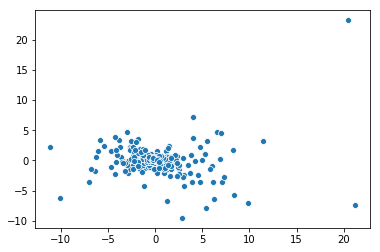

In [44]:
sns.scatterplot(Xt[:,0], Xt[:,1])

In [45]:
df2 = pd.DataFrame(Xt, index=X.index)
df2

,0,1
userId,,
1,-3.721269,2.201110
2,0.057224,0.052274
3,0.845266,-0.002030
4,1.456188,0.511796
5,0.300683,-0.116436
6,-1.825522,3.548521
7,0.767574,0.714087
8,0.021227,-0.115464
9,-0.284445,-0.037700


In [46]:
df2.round(2)

,0,1
userId,,
1,-3.72,2.20
2,0.06,0.05
3,0.85,-0.00
4,1.46,0.51
5,0.30,-0.12
6,-1.83,3.55
7,0.77,0.71
8,0.02,-0.12
9,-0.28,-0.04


In [47]:
df2.info

<bound method DataFrame.info of                 0         1
userId                     
1       -3.721269  2.201110
2        0.057224  0.052274
3        0.845266 -0.002030
4        1.456188  0.511796
5        0.300683 -0.116436
6       -1.825522  3.548521
7        0.767574  0.714087
8        0.021227 -0.115464
9       -0.284445 -0.037700
10       1.242866  0.507834
11      -0.853989  0.740325
12      -0.659017  0.275848
13      -0.442645 -0.078382
14       0.241438  0.069358
15       1.164052  0.808772
16       0.964798  0.165035
17      -1.173113  0.252676
18      -0.819666 -0.692790
19       6.201306 -6.403292
20      -1.256495  1.201733
21       1.150227  1.517162
22       3.975688  3.719521
23       0.725227  0.123343
24       0.097820  0.260629
25      -0.800152 -0.283864
26       0.254558 -0.243403
27      -0.247313  0.481389
28       6.841268  0.288681
29      -0.660415  0.050659
30      -1.023216 -0.552857
...           ...       ...
581     -0.573180 -0.191805
582     -0.29980

In [48]:
# df2(df2[1] > 15)

df2 = [X for X in Xt if X >= 15]
df2.sort()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
np.dot(X.values, pca.components_.T)